## Point to Point bookings

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy import distance

In [5]:
df = pd.read_csv('df_travel_type_2.csv')

In [7]:
df

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34287,NaN,2,585.0,1226.0,15.0,NaN,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0
34288,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
34289,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
34290,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [8]:
df.isna().sum()

package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

## Data Cleaning

#### We dont need package_id and to_city_id since all the values are null

#### We cant use from_city_id too since more than 50% is Nan

#### We dont need travel_type_id because it's all same value

In [9]:
df=df.drop(['package_id','from_city_id','to_city_id'],axis=1)

In [10]:
df=df.drop(['travel_type_id'],axis=1)


In [11]:
df.shape

(34292, 11)

In [12]:
df.isna().sum()

from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

# Data Transformation

In [13]:
df['from_date'] = pd.to_datetime(df['from_date'],format='mixed')
df['booking_created'] = pd.to_datetime(df['booking_created'],format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34292 entries, 0 to 34291
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         34292 non-null  float64       
 1   to_area_id           34292 non-null  float64       
 2   from_date            34292 non-null  datetime64[ns]
 3   online_booking       34292 non-null  int64         
 4   mobile_site_booking  34292 non-null  int64         
 5   booking_created      34292 non-null  datetime64[ns]
 6   from_lat             34292 non-null  float64       
 7   from_long            34292 non-null  float64       
 8   to_lat               34292 non-null  float64       
 9   to_long              34292 non-null  float64       
 10  Car_Cancellation     34292 non-null  int64         
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 2.9 MB


In [14]:
df['is_weekend'] = df['from_date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
df['booking_gap'] = (df['from_date'] - df['booking_created']).dt.days

df.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_weekend,booking_gap
0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,0
1,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,0,0
2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,0,0
3,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,0,0
4,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,0,0


In [15]:
df['trip_day'] = df['from_date'].dt.day_name()
df['booking_created_day'] = df['booking_created'].dt.day_name()
df.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day
0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,0,Tuesday,Tuesday
1,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,0,0,Tuesday,Tuesday
2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,0,0,Tuesday,Tuesday
3,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,0,0,Tuesday,Tuesday
4,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,0,0,Tuesday,Tuesday


In [16]:
df['trip_month'] = df['from_date'].dt.month_name()
df['booking_created_month'] = df['booking_created'].dt.month_name()
df

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month
0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,0,Tuesday,Tuesday,January,January
1,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,0,0,Tuesday,Tuesday,January,January
2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,0,0,Tuesday,Tuesday,January,January
3,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,0,0,Tuesday,Tuesday,January,January
4,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,0,0,Tuesday,Tuesday,January,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34287,585.0,1226.0,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.976770,77.572700,13.015080,77.677960,0,0,0,Monday,Sunday,November,November
34288,1147.0,452.0,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,13.030640,77.649100,12.952780,77.590880,0,1,0,Sunday,Sunday,November,November
34289,393.0,466.0,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,13.199560,77.706880,13.017436,77.644580,0,0,1,Tuesday,Sunday,November,November
34290,1263.0,542.0,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,12.968970,77.594560,12.938230,77.622890,0,1,0,Sunday,Sunday,November,November


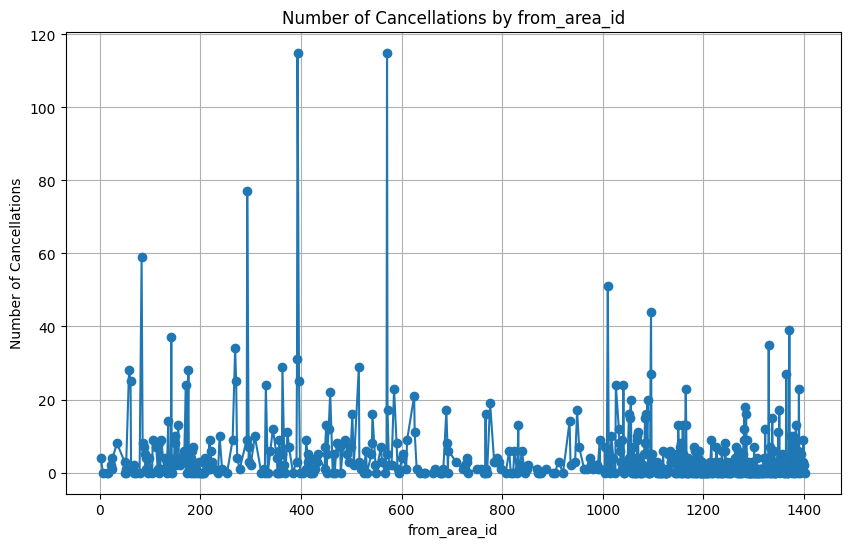

In [17]:
cancellations_by_area = df.groupby('from_area_id')['Car_Cancellation'].sum().reset_index()

# Step 2: Sort the data by from_area_id for a smoother curve
cancellations_by_area = cancellations_by_area.sort_values('from_area_id')

# Step 3: Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(cancellations_by_area['from_area_id'], cancellations_by_area['Car_Cancellation'], marker='o')
plt.title('Number of Cancellations by from_area_id')
plt.xlabel('from_area_id')
plt.ylabel('Number of Cancellations')
plt.grid(True)
plt.show()

## this is not clear

In [18]:
# Step 1: Group by from_area_id and sum Car_Cancellation
cancellations_by_area = df.groupby('from_area_id')['Car_Cancellation'].sum().reset_index()

# Step 2: Define the thresholds for the categories
# Zero Cancellation: 0 cancellations
# Low Cancellation: 1st quartile (up to 25th percentile)
# Medium Cancellation: 2nd and 3rd quartiles (25th to 75th percentile)
# Higher Cancellation: 4th quartile (above 75th percentile)

# Step 3: Calculate the thresholds for the quartiles
low_threshold = cancellations_by_area['Car_Cancellation'].quantile(0.25)
medium_threshold = cancellations_by_area['Car_Cancellation'].quantile(0.75)

# Step 4: Create a function to categorize each from_area_id
def categorize_cancellation(row):
    if row['Car_Cancellation'] == 0:
        return 'Zero Cancellation'
    elif row['Car_Cancellation'] <= low_threshold:
        return 'Low Cancellation'
    elif row['Car_Cancellation'] <= medium_threshold:
        return 'Medium Cancellation'
    else:
        return 'Higher Cancellation'

# Step 5: Apply the function to create a new column 'Cancellation_Category'
cancellations_by_area['Cancellation_Category'] = cancellations_by_area.apply(categorize_cancellation, axis=1)

# Step 6: View the result
cancellations_by_area[['from_area_id', 'Car_Cancellation', 'Cancellation_Category']]


,from_area_id,Car_Cancellation,Cancellation_Category
0,2.0,4,Medium Cancellation
1,6.0,0,Zero Cancellation
2,15.0,0,Zero Cancellation
3,16.0,0,Zero Cancellation
4,22.0,2,Medium Cancellation
...,...,...,...
581,1395.0,5,Medium Cancellation
582,1398.0,3,Medium Cancellation
583,1399.0,9,Higher Cancellation
584,1401.0,2,Medium Cancellation


### We are dividing the from_area_id into four categories, Zero,Low,Medium,High

In [19]:
# Create a function to categorize each from_area_id
def categorize_cancellation(row):
    if row['Car_Cancellation'] == 0:
        return 'Zero Cancellation'
    elif row['Car_Cancellation'] <= low_threshold:
        return 'Low Cancellation'
    elif row['Car_Cancellation'] <= medium_threshold:
        return 'Medium Cancellation'
    else:
        return 'Higher Cancellation'

# Apply the function to create a new column 'Cancellation_Category' in cancellations_by_area
cancellations_by_area['from_area_Category'] = cancellations_by_area.apply(categorize_cancellation, axis=1)

# Merge the cancellation categories back to the original df
df = df.merge(cancellations_by_area[['from_area_id', 'from_area_Category']], on='from_area_id', how='left')

#View the updated DataFrame
df.head(6)


,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category
0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation
1,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation
2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation
3,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,0,0,Tuesday,Tuesday,January,January,Medium Cancellation
4,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation
5,1021.0,1323.0,2013-01-01 22:30:00,0,0,2013-01-01 08:01:00,13.028530,77.546250,12.869805,77.653211,0,0,0,Tuesday,Tuesday,January,January,Medium Cancellation


In [20]:
# Cross checking
df.loc[df['from_area_id']==1399].head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category
18463,1399.0,83.0,2013-07-18 18:00:00,0,0,2013-07-18 13:39:00,12.944965,77.683676,12.924150,77.672290,0,0,0,Thursday,Thursday,July,July,Higher Cancellation
18703,1399.0,571.0,2013-07-20 02:30:00,1,0,2013-07-19 23:39:00,12.944965,77.683676,12.951850,77.696420,0,1,0,Saturday,Friday,July,July,Higher Cancellation
19008,1399.0,83.0,2013-07-22 17:30:00,0,0,2013-07-22 14:27:00,12.944965,77.683676,12.924150,77.672290,0,0,0,Monday,Monday,July,July,Higher Cancellation
19062,1399.0,1339.0,2013-07-23 09:00:00,0,0,2013-07-22 21:25:00,12.944965,77.683676,12.978129,77.646141,0,0,0,Tuesday,Monday,July,July,Higher Cancellation
19080,1399.0,142.0,2013-07-23 08:30:00,0,0,2013-07-23 03:44:00,12.944965,77.683676,12.912810,77.609230,0,0,0,Tuesday,Tuesday,July,July,Higher Cancellation


In [21]:
df.shape

(34292, 18)

In [22]:
df.isna().sum()

from_area_id             0
to_area_id               0
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
from_lat                 0
from_long                0
to_lat                   0
to_long                  0
Car_Cancellation         0
is_weekend               0
booking_gap              0
trip_day                 0
booking_created_day      0
trip_month               0
booking_created_month    0
from_area_Category       0
dtype: int64

### We are dividing to_area similarly into Zero, low, medium,high cancellation

In [23]:
# Step 1: Group by from_area_id and sum Car_Cancellation
cancellations_by_area = df.groupby('to_area_id')['Car_Cancellation'].sum().reset_index()

# Step 2: Define the thresholds for the categories
# Zero Cancellation: 0 cancellations
# Low Cancellation: 1st quartile (up to 25th percentile)
# Medium Cancellation: 2nd and 3rd quartiles (25th to 75th percentile)
# Higher Cancellation: 4th quartile (above 75th percentile)

# Step 3: Calculate the thresholds for the quartiles
low_threshold = cancellations_by_area['Car_Cancellation'].quantile(0.25)
medium_threshold = cancellations_by_area['Car_Cancellation'].quantile(0.75)

# Create a function to categorize each from_area_id
def categorize_cancellation(row):
    if row['Car_Cancellation'] == 0:
        return 'Zero Cancellation'
    elif row['Car_Cancellation'] <= low_threshold:
        return 'Low Cancellation'
    elif row['Car_Cancellation'] <= medium_threshold:
        return 'Medium Cancellation'
    else:
        return 'Higher Cancellation'

# Apply the function to create a new column 'Cancellation_Category' in cancellations_by_area
cancellations_by_area['to_area_Category'] = cancellations_by_area.apply(categorize_cancellation, axis=1)

# Merge the cancellation categories back to the original df
df = df.merge(cancellations_by_area[['to_area_id', 'to_area_Category']], on='to_area_id', how='left')

#View the updated DataFrame
df


,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,to_area_Category
0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation
1,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation
2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation
3,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,0,0,Tuesday,Tuesday,January,January,Medium Cancellation,Zero Cancellation
4,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34287,585.0,1226.0,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.976770,77.572700,13.015080,77.677960,0,0,0,Monday,Sunday,November,November,Higher Cancellation,Medium Cancellation
34288,1147.0,452.0,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,13.030640,77.649100,12.952780,77.590880,0,1,0,Sunday,Sunday,November,November,Medium Cancellation,Higher Cancellation
34289,393.0,466.0,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,13.199560,77.706880,13.017436,77.644580,0,0,1,Tuesday,Sunday,November,November,Higher Cancellation,Higher Cancellation
34290,1263.0,542.0,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,12.968970,77.594560,12.938230,77.622890,0,1,0,Sunday,Sunday,November,November,Medium Cancellation,Higher Cancellation


### We are calculating the distance using latitude and Longitude

In [24]:
from geopy.distance import geodesic
def calculate_distance(row):
    from_coords = (row['from_lat'], row['from_long'])
    to_coords = (row['to_lat'], row['to_long'])
    return geodesic(from_coords, to_coords).kilometers

# Apply the function to each row and create a new column
df['distance_km'] = df.apply(calculate_distance, axis=1)


df


,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,to_area_Category,distance_km
0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,3.980687
1,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,14.004432
2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,12.648909
3,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,0,0,Tuesday,Tuesday,January,January,Medium Cancellation,Zero Cancellation,9.534596
4,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,14.655467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34287,585.0,1226.0,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.976770,77.572700,13.015080,77.677960,0,0,0,Monday,Sunday,November,November,Higher Cancellation,Medium Cancellation,12.180435
34288,1147.0,452.0,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,13.030640,77.649100,12.952780,77.590880,0,1,0,Sunday,Sunday,November,November,Medium Cancellation,Higher Cancellation,10.681284
34289,393.0,466.0,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,13.199560,77.706880,13.017436,77.644580,0,0,1,Tuesday,Sunday,November,November,Higher Cancellation,Higher Cancellation,21.251031
34290,1263.0,542.0,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,12.968970,77.594560,12.938230,77.622890,0,1,0,Sunday,Sunday,November,November,Medium Cancellation,Higher Cancellation,4.584142


### Now we need to create two columns for the part of day the trip is and booking is done

In [25]:
hour = df['from_date'].dt.hour

# Define conditions for time of day
cond = [
    hour.between(5, 8),   # Early Morning
    hour.between(9, 12),  # Morning
    hour.between(13, 16), # Afternoon
    hour.between(17, 20), # Evening
    (hour.between(21, 23)) | (hour == 0), # Night
    hour.between(1, 4)    # Late Night
]

# Define values corresponding to each condition
values = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

# Create new column based on conditions
df['trip_time_of_day'] = np.select(cond, values, default='Unknown')

# Display the DataFrame with the new column
df

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,...,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,to_area_Category,distance_km,trip_time_of_day
0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,...,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,3.980687,Late Night
1,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,...,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,14.004432,Morning
2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,...,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,12.648909,Late Night
3,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,...,0,0,Tuesday,Tuesday,January,January,Medium Cancellation,Zero Cancellation,9.534596,Early Morning
4,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,...,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,14.655467,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34287,585.0,1226.0,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.976770,77.572700,13.015080,77.677960,...,0,0,Monday,Sunday,November,November,Higher Cancellation,Medium Cancellation,12.180435,Night
34288,1147.0,452.0,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,13.030640,77.649100,12.952780,77.590880,...,1,0,Sunday,Sunday,November,November,Medium Cancellation,Higher Cancellation,10.681284,Evening
34289,393.0,466.0,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,13.199560,77.706880,13.017436,77.644580,...,0,1,Tuesday,Sunday,November,November,Higher Cancellation,Higher Cancellation,21.251031,Late Night
34290,1263.0,542.0,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,12.968970,77.594560,12.938230,77.622890,...,1,0,Sunday,Sunday,November,November,Medium Cancellation,Higher Cancellation,4.584142,Afternoon


In [26]:
hour = df['booking_created'].dt.hour

# Define conditions for time of day
cond = [
    hour.between(5, 8),   # Early Morning
    hour.between(9, 12),  # Morning
    hour.between(13, 16), # Afternoon
    hour.between(17, 20), # Evening
    (hour.between(21, 23)) | (hour == 0), # Night
    hour.between(1, 4)    # Late Night
]

# Define values corresponding to each condition
values = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

# Create new column based on conditions
df['booking_time_of_day'] = np.select(cond, values, default='Unknown')

# Display the DataFrame with the new column
df

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,...,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,to_area_Category,distance_km,trip_time_of_day,booking_time_of_day
0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,...,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,3.980687,Late Night,Late Night
1,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,...,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,14.004432,Morning,Late Night
2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,...,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,12.648909,Late Night,Late Night
3,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,...,0,Tuesday,Tuesday,January,January,Medium Cancellation,Zero Cancellation,9.534596,Early Morning,Late Night
4,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,...,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,14.655467,Morning,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34287,585.0,1226.0,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.976770,77.572700,13.015080,77.677960,...,0,Monday,Sunday,November,November,Higher Cancellation,Medium Cancellation,12.180435,Night,Afternoon
34288,1147.0,452.0,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,13.030640,77.649100,12.952780,77.590880,...,0,Sunday,Sunday,November,November,Medium Cancellation,Higher Cancellation,10.681284,Evening,Afternoon
34289,393.0,466.0,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,13.199560,77.706880,13.017436,77.644580,...,1,Tuesday,Sunday,November,November,Higher Cancellation,Higher Cancellation,21.251031,Late Night,Afternoon
34290,1263.0,542.0,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,12.968970,77.594560,12.938230,77.622890,...,0,Sunday,Sunday,November,November,Medium Cancellation,Higher Cancellation,4.584142,Afternoon,Afternoon


## We no longer need following  columns

#### from_area_id
#### to_area_id
#### from_date
#### booking_created
#### from_lat,from_long,to_lat,to_long

In [27]:
df=df.drop(['from_area_id','to_area_id','from_date','booking_created','from_lat','from_long','to_lat','to_long'],axis=1)

In [28]:
df.head(5)

,online_booking,mobile_site_booking,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,to_area_Category,distance_km,trip_time_of_day,booking_time_of_day
0,0,0,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,3.980687,Late Night,Late Night
1,0,0,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,14.004432,Morning,Late Night
2,0,0,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,12.648909,Late Night,Late Night
3,0,0,0,0,0,Tuesday,Tuesday,January,January,Medium Cancellation,Zero Cancellation,9.534596,Early Morning,Late Night
4,0,0,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,14.655467,Morning,Early Morning


In [29]:
num_df = df.select_dtypes(include='number')
char_df = df.select_dtypes(include='object')

In [30]:
char_df.head()

,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,to_area_Category,trip_time_of_day,booking_time_of_day
0,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,Late Night,Late Night
1,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,Morning,Late Night
2,Tuesday,Tuesday,January,January,Higher Cancellation,Medium Cancellation,Late Night,Late Night
3,Tuesday,Tuesday,January,January,Medium Cancellation,Zero Cancellation,Early Morning,Late Night
4,Tuesday,Tuesday,January,January,Higher Cancellation,Higher Cancellation,Morning,Early Morning


In [31]:
X_char_dum = pd.get_dummies(char_df, drop_first = True).astype('int')
X_char_dum.shape

(34292, 47)

In [32]:
pd.set_option('display.max_columns', None)
X_char_dum.head()

,trip_day_Monday,trip_day_Saturday,trip_day_Sunday,trip_day_Thursday,trip_day_Tuesday,trip_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday,trip_month_August,trip_month_December,trip_month_February,trip_month_January,trip_month_July,trip_month_June,trip_month_March,trip_month_May,trip_month_November,trip_month_October,trip_month_September,booking_created_month_August,booking_created_month_February,booking_created_month_January,booking_created_month_July,booking_created_month_June,booking_created_month_March,booking_created_month_May,booking_created_month_November,booking_created_month_October,booking_created_month_September,from_area_Category_Medium Cancellation,from_area_Category_Zero Cancellation,to_area_Category_Medium Cancellation,to_area_Category_Zero Cancellation,trip_time_of_day_Early Morning,trip_time_of_day_Evening,trip_time_of_day_Late Night,trip_time_of_day_Morning,trip_time_of_day_Night,booking_time_of_day_Early Morning,booking_time_of_day_Evening,booking_time_of_day_Late Night,booking_time_of_day_Morning,booking_time_of_day_Night
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [33]:
X = pd.concat([num_df,X_char_dum], axis=1)
X

,online_booking,mobile_site_booking,Car_Cancellation,is_weekend,booking_gap,distance_km,trip_day_Monday,trip_day_Saturday,trip_day_Sunday,trip_day_Thursday,trip_day_Tuesday,trip_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday,trip_month_August,trip_month_December,trip_month_February,trip_month_January,trip_month_July,trip_month_June,trip_month_March,trip_month_May,trip_month_November,trip_month_October,trip_month_September,booking_created_month_August,booking_created_month_February,booking_created_month_January,booking_created_month_July,booking_created_month_June,booking_created_month_March,booking_created_month_May,booking_created_month_November,booking_created_month_October,booking_created_month_September,from_area_Category_Medium Cancellation,from_area_Category_Zero Cancellation,to_area_Category_Medium Cancellation,to_area_Category_Zero Cancellation,trip_time_of_day_Early Morning,trip_time_of_day_Evening,trip_time_of_day_Late Night,trip_time_of_day_Morning,trip_time_of_day_Night,booking_time_of_day_Early Morning,booking_time_of_day_Evening,booking_time_of_day_Late Night,booking_time_of_day_Morning,booking_time_of_day_Night
0,0,0,0,0,0,3.980687,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,14.004432,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,12.648909,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,9.534596,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,14.655467,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34287,0,1,0,0,0,12.180435,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
34288,1,0,0,1,0,10.681284,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
34289,1,0,0,0,1,21.251031,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
34290,0,0,0,1,0,4.584142,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
y = df[['Car_Cancellation']]
y.head()

,Car_Cancellation
0,0
1,0
2,0
3,0
4,0


In [35]:
X = X.drop(['Car_Cancellation'],axis=1)


In [36]:
X.head()

,online_booking,mobile_site_booking,is_weekend,booking_gap,distance_km,trip_day_Monday,trip_day_Saturday,trip_day_Sunday,trip_day_Thursday,trip_day_Tuesday,trip_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday,trip_month_August,trip_month_December,trip_month_February,trip_month_January,trip_month_July,trip_month_June,trip_month_March,trip_month_May,trip_month_November,trip_month_October,trip_month_September,booking_created_month_August,booking_created_month_February,booking_created_month_January,booking_created_month_July,booking_created_month_June,booking_created_month_March,booking_created_month_May,booking_created_month_November,booking_created_month_October,booking_created_month_September,from_area_Category_Medium Cancellation,from_area_Category_Zero Cancellation,to_area_Category_Medium Cancellation,to_area_Category_Zero Cancellation,trip_time_of_day_Early Morning,trip_time_of_day_Evening,trip_time_of_day_Late Night,trip_time_of_day_Morning,trip_time_of_day_Night,booking_time_of_day_Early Morning,booking_time_of_day_Evening,booking_time_of_day_Late Night,booking_time_of_day_Morning,booking_time_of_day_Night
0,0,0,0,0,3.980687,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,14.004432,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,12.648909,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,9.534596,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,14.655467,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


## Train test split

In [37]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy = 'minority',n_jobs=-1)
x_res, y_res = smt.fit_resample(X, y)

C:\Users\lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.3,random_state=1)

In [39]:
import warnings
warnings.filterwarnings('ignore')

# Model Building 

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4)
lr.fit(X_train,y_train)

LogisticRegression(random_state=4)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=4)

In [42]:
from sklearn.model_selection import GridSearchCV
param_dist = {'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [43]:
gscv_dtc.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 50}

In [44]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=4,max_depth=6,min_samples_split=50)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=50,
                       random_state=4)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',random_state=4)

In [46]:
param_dist = {'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_rfc = GridSearchCV(rfc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_rfc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [47]:
gscv_rfc.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 50}

In [48]:
rfc=RandomForestClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=50, random_state=4)

# Model Evaluation

In [49]:
y_pred_lr=lr.predict(X_test)
y_pred_dtc=dtc.predict(X_test)
y_pred_rfc=rfc.predict(X_test)

In [50]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [51]:
print('Logistic Regression Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr))
print('Precision:', metrics.precision_score(y_test, y_pred_lr))
print('Recall:', metrics.recall_score(y_test, y_pred_lr))
print('f1_score:', metrics.f1_score(y_test, y_pred_lr))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_lr))

Logistic Regression Metrics
Accuracy: 0.8519107436264377
Precision: 0.8425674263014844
Recall: 0.8622165169020112
f1_score: 0.8522787353283281
cnf_matrix:
 [[8013 1506]
 [1288 8060]]


## Area under curve Logistic Regression

In [52]:
from sklearn.metrics import roc_curve, auc


In [53]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_lr)
roc_auc_dt = auc(fpr_dt,tpr_dt)

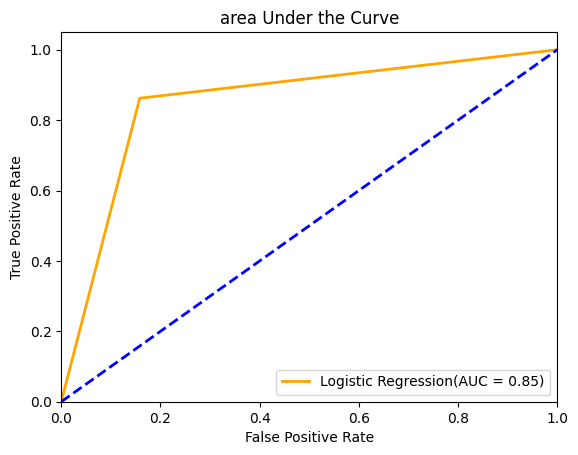

In [54]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Logistic Regression(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [55]:
print('Decision Tree Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_dtc))
print('Precision:', metrics.precision_score(y_test, y_pred_dtc))
print('Recall:', metrics.recall_score(y_test, y_pred_dtc))
print('f1_score:', metrics.f1_score(y_test, y_pred_dtc))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_dtc))

Decision Tree Metrics
Accuracy: 0.7323898871044682
Precision: 0.6838279312409133
Recall: 0.8553701326486949
f1_score: 0.7600399220569365
cnf_matrix:
 [[5822 3697]
 [1352 7996]]


## Area under curve Decision tree

In [56]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dtc)
roc_auc_dt = auc(fpr_dt,tpr_dt)

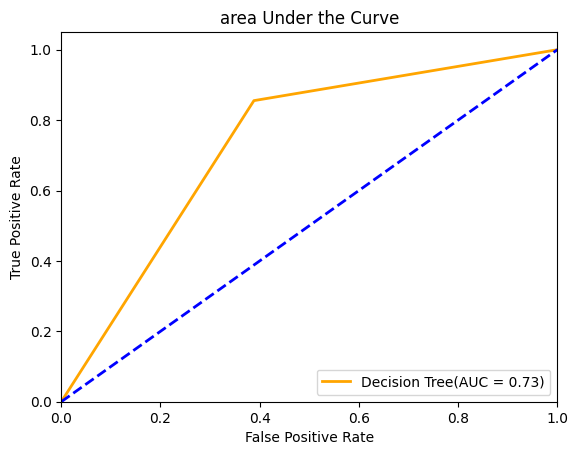

In [57]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [58]:
print('Random Forest Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rfc))
print('Precision:', metrics.precision_score(y_test, y_pred_rfc))
print('Recall:', metrics.recall_score(y_test, y_pred_rfc))
print('f1_score:', metrics.f1_score(y_test, y_pred_rfc))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_rfc))

Random Forest Metrics
Accuracy: 0.8093496581332486
Precision: 0.7813325506310537
Recall: 0.8543003851091142
f1_score: 0.8161888701517707
cnf_matrix:
 [[7284 2235]
 [1362 7986]]


In [59]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_rfc)
roc_auc_dt = auc(fpr_dt,tpr_dt)

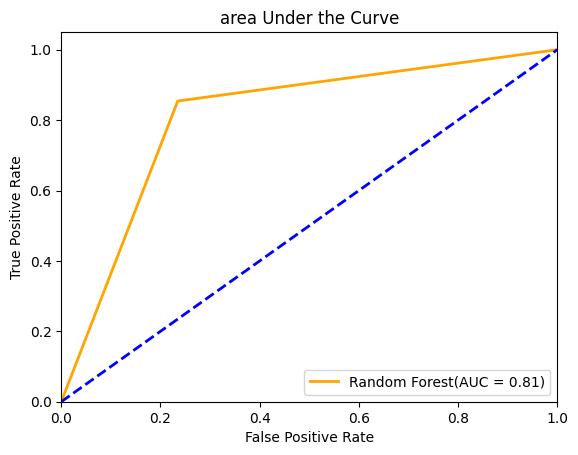

In [60]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Random Forest(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

# ADA BOOST

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
# Initialize the base estimator
base_estimator = DecisionTreeClassifier()

# Initialize the AdaBoost model
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],       # Learning rate
    'base_estimator__max_depth': [1, 2, 3]   # Max depth of the base estimator
}


In [63]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [119]:
grid_search.best_params_

{'base_estimator__max_depth': 3, 'learning_rate': 1.0, 'n_estimators': 200}

In [120]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)


In [127]:
# Initialize the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator, n_estimators=200, learning_rate=1.0, random_state=4)

# Train the AdaBoost model
ada_boost.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=200, random_state=4)

In [122]:
# Make predictions on the test set
y_pred_ada = ada_boost.predict(X_test)


In [123]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
print(classification_report(y_test, y_pred_ada))


Accuracy: 52.66%
              precision    recall  f1-score   support

           0       0.54      0.47      0.50      9519
           1       0.52      0.58      0.55      9348

    accuracy                           0.53     18867
   macro avg       0.53      0.53      0.53     18867
weighted avg       0.53      0.53      0.53     18867



In [124]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print('ADA_BOOST')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_ada))
print('Precision:', metrics.precision_score(y_test, y_pred_ada))
print('Recall:', metrics.recall_score(y_test, y_pred_ada))
print('f1_score:', metrics.f1_score(y_test, y_pred_ada))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_ada))

ADA_BOOST
Accuracy: 0.5266338050564477
Precision: 0.519874177866743
Recall: 0.5834403080872914
f1_score: 0.5498261001058521
cnf_matrix:
 [[4482 5037]
 [3894 5454]]


In [125]:
y_pred_prob = ada_boost.predict_proba(X_test)[:,1]
fpr_ada,tpr_ada,_=roc_curve(y_test,y_pred_ada)
roc_auc_ada = auc(fpr_dt,tpr_ada)

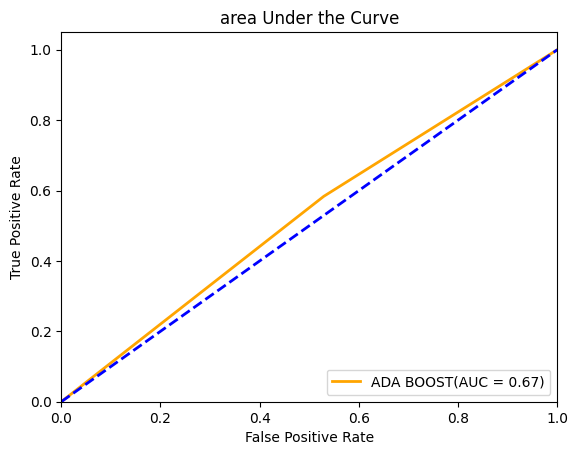

In [126]:
plt.figure(1)
lw=2
plt.plot(fpr_ada,tpr_ada,color='orange',lw=lw,label='ADA BOOST(AUC = %0.2f)'%roc_auc_ada)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## ADA BOOST works best of all models but recall is very low